In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/NLP/Customer Recommendation Prediction')
!ls

'Customer Recommendation Predictionipynb'  'Women Dresses Reviews Dataset .csv'


In [3]:
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import time
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

In [14]:
df = pd.read_csv('Women Dresses Reviews Dataset .csv')

In [15]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [17]:
df.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [22]:
df = df.rename(columns={'recommend_index ': 'recommend_index'})

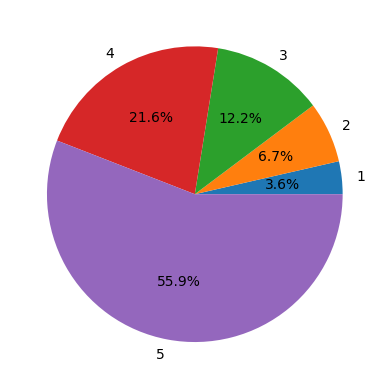

In [23]:
label = ['1','2','3','4','5']
plt.pie(df.groupby('rating')['rating'].count(),autopct='%.1f%%',labels=label)
plt.show()

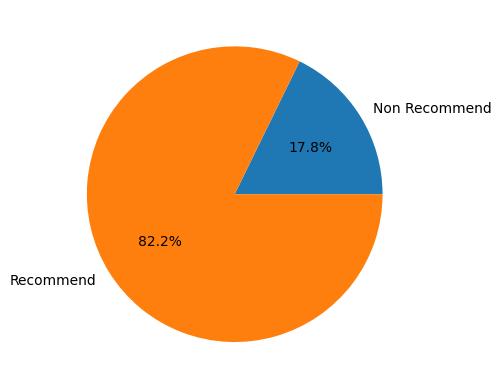

In [24]:
label2=['Non Recommend', 'Recommend']
plt.pie(df.groupby('recommend_index')['recommend_index'].count(),autopct="%.1f%%",labels=label2)
plt.show()

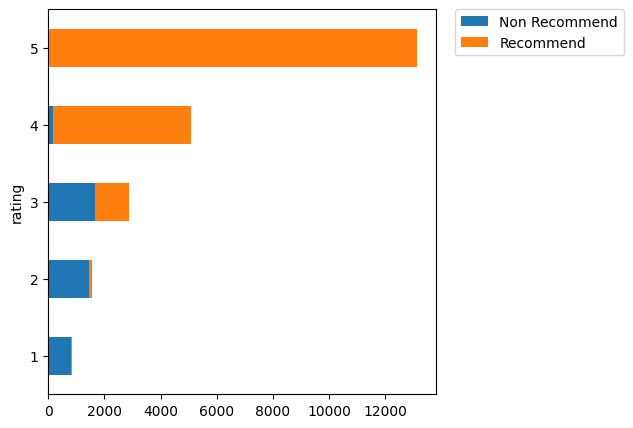

In [25]:
pd.DataFrame(df.groupby('rating')['recommend_index'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0,fontsize=10,labels=label2)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

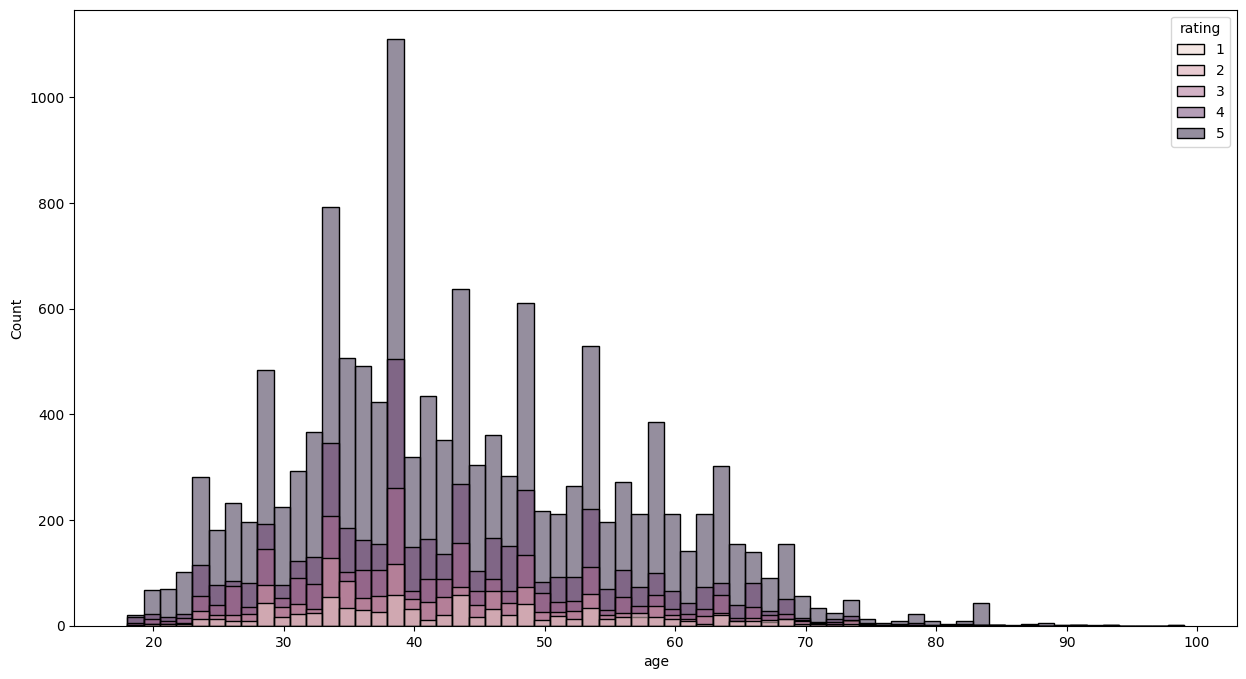

In [26]:
plt.figure(figsize=(15,8))
sns.histplot(data=df,x='age',hue='rating')

<Axes: xlabel='age', ylabel='Count'>

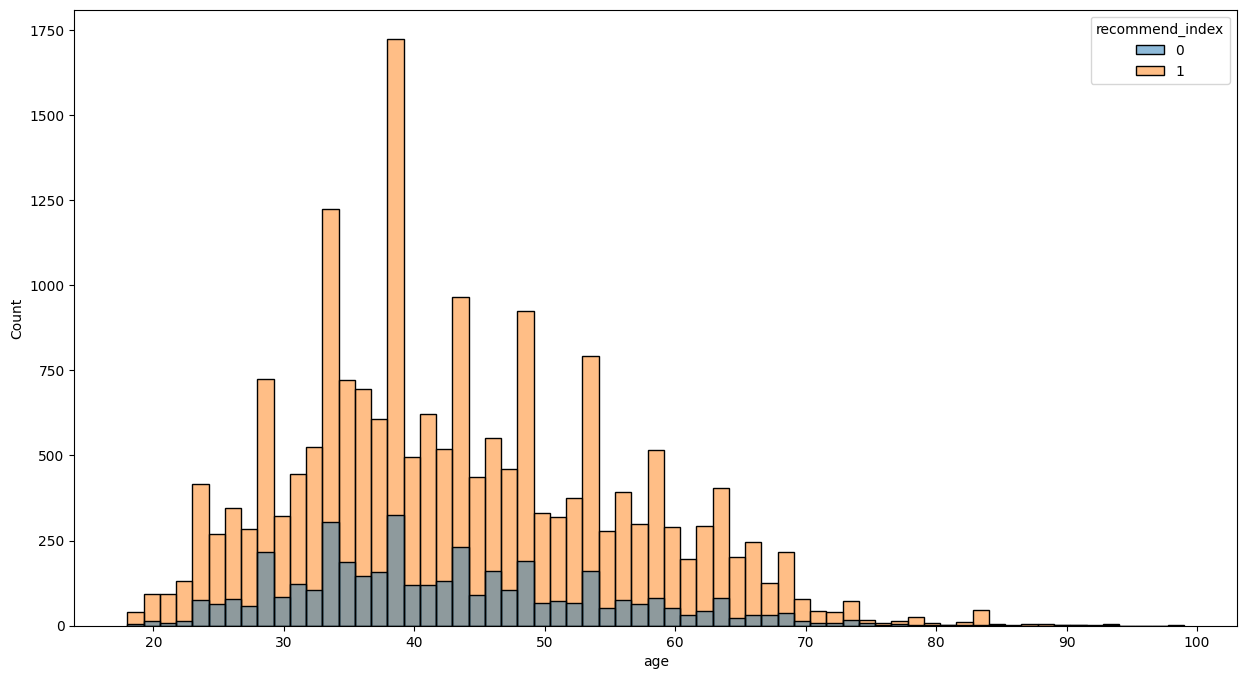

In [27]:
plt.figure(figsize=(15,8))
sns.histplot(data=df,x='age',hue='recommend_index')

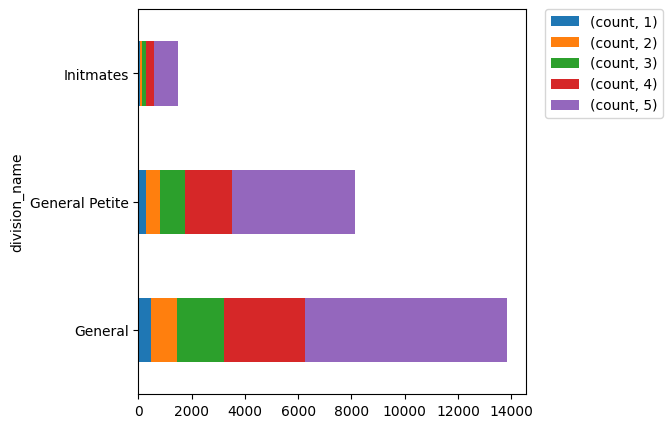

In [28]:
pd.DataFrame(df.groupby('division_name')['rating'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0,fontsize=10)
plt.show()

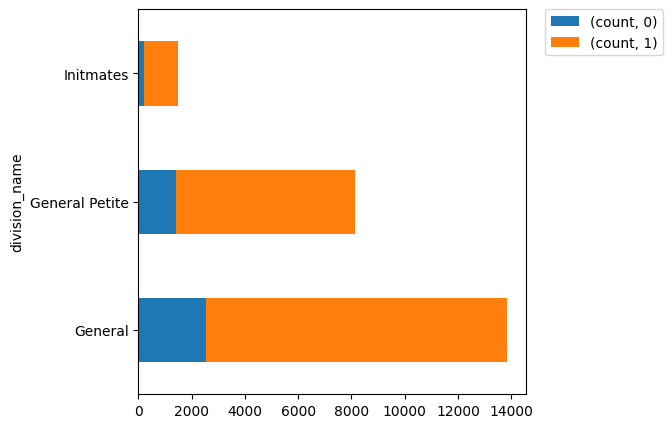

In [29]:
pd.DataFrame(df.groupby('division_name')['recommend_index'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

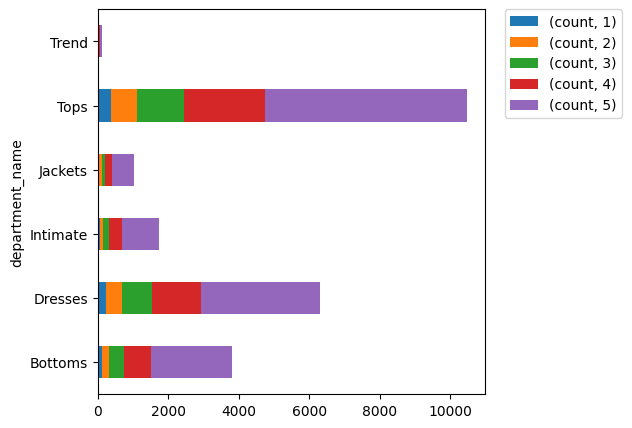

In [30]:
pd.DataFrame(df.groupby('department_name')['rating'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

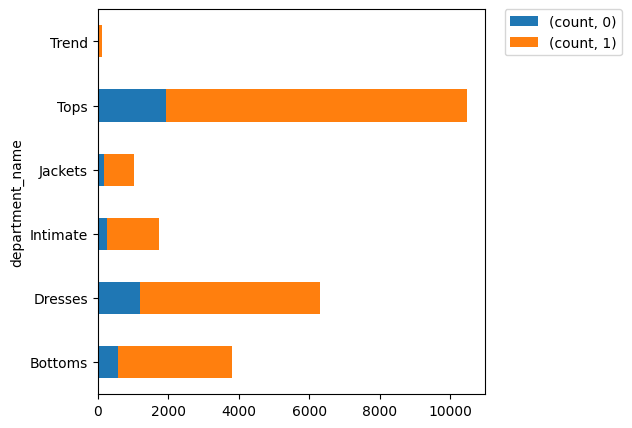

In [31]:
pd.DataFrame(df.groupby('department_name')['recommend_index'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

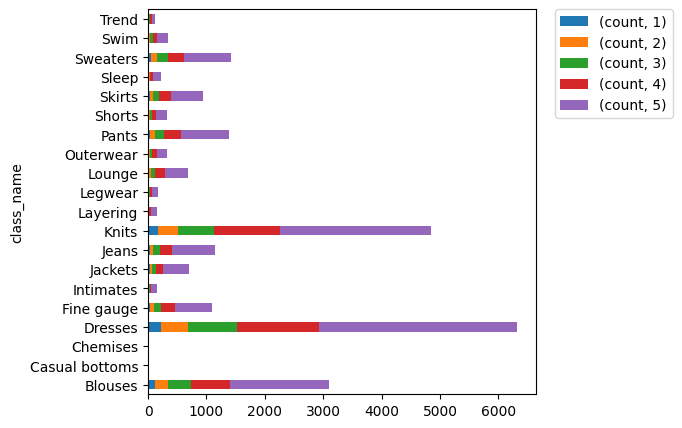

In [32]:
pd.DataFrame(df.groupby('class_name')['rating'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

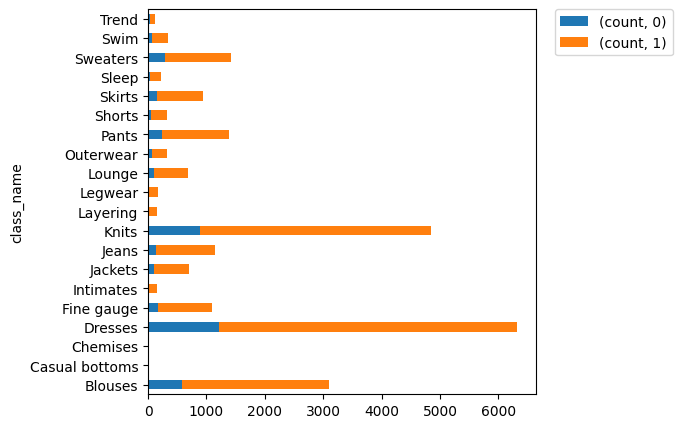

In [33]:
pd.DataFrame(df.groupby('class_name')['recommend_index'].value_counts()).unstack().plot.barh(figsize=(5,5),stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

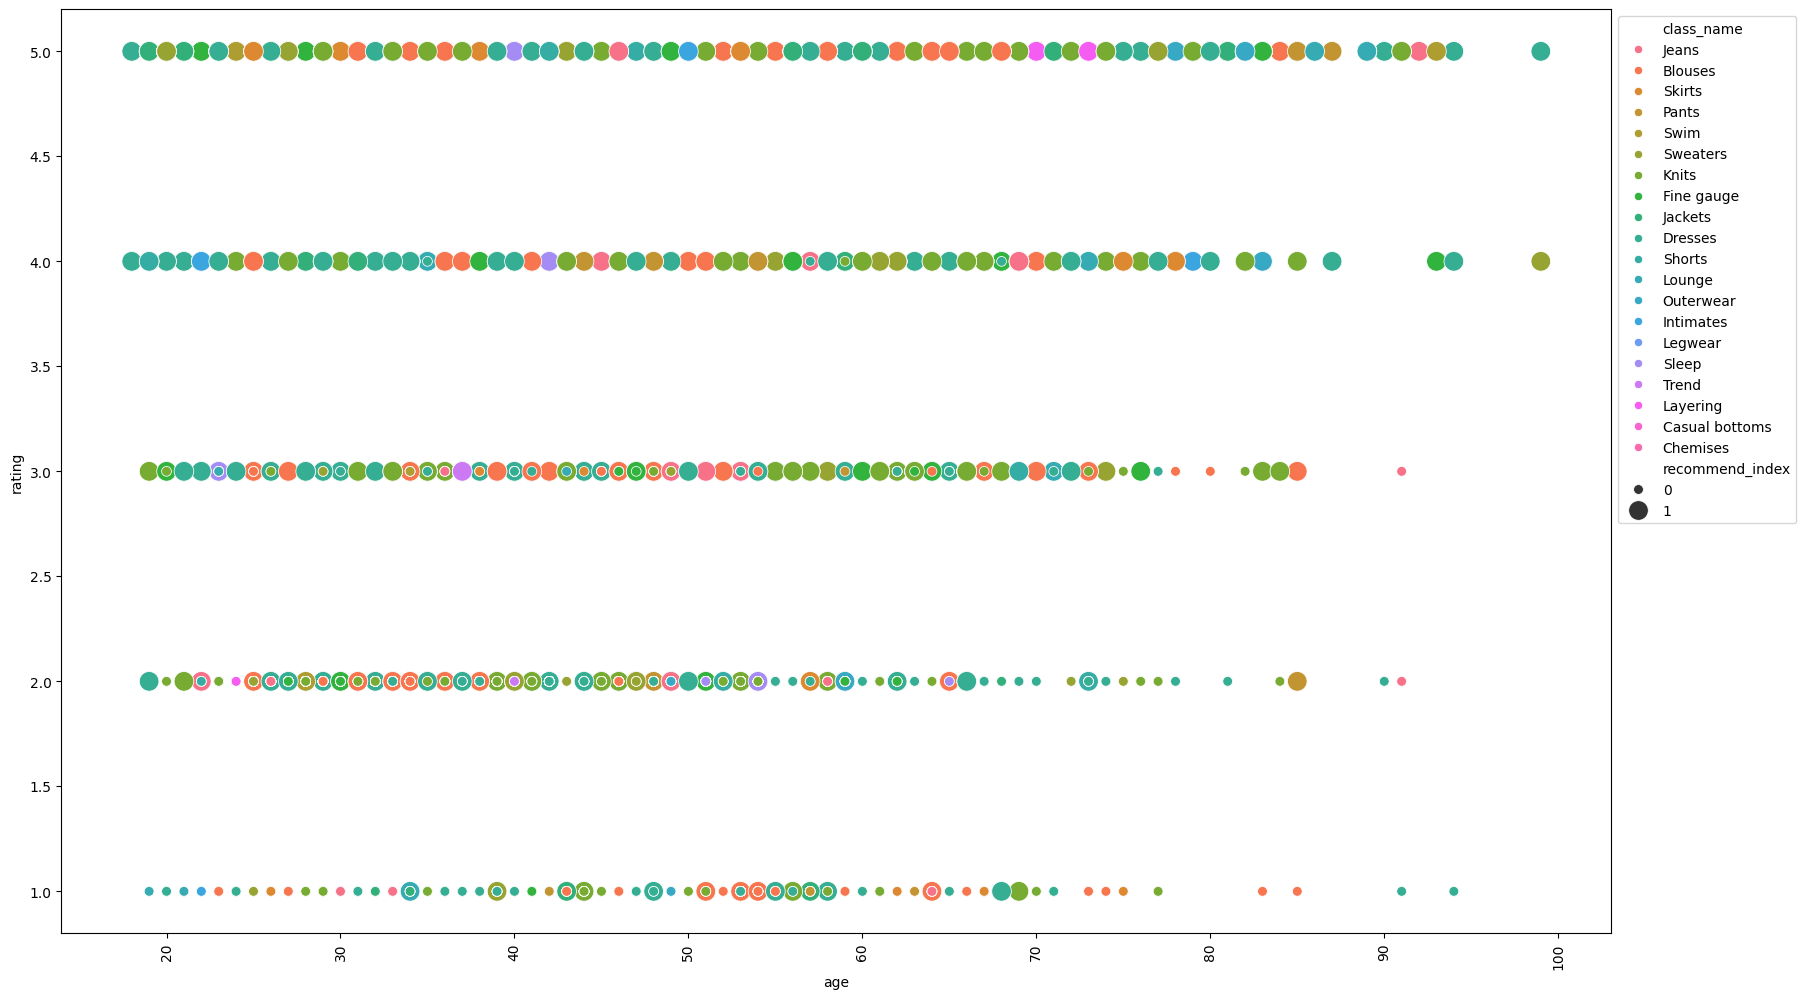

In [34]:
plt.figure(figsize=(20, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df['age'],y=df['rating'],hue=df['class_name'],size=df['recommend_index'],data=df,sizes=(200,50))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

In [35]:
df = df.dropna()

In [36]:
df = df.reset_index()

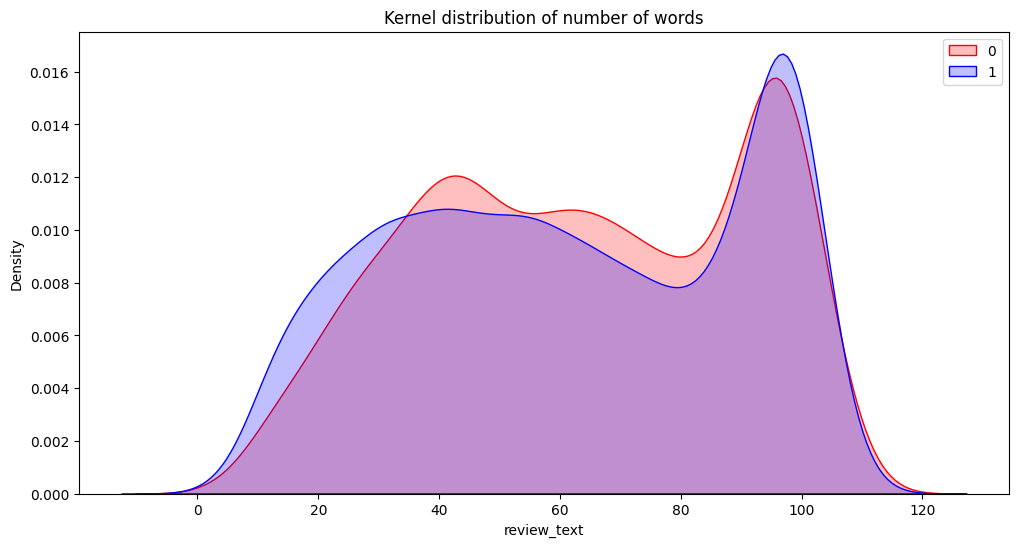

In [37]:
num_1 = df[df['recommend_index'] == 0]['review_text'].apply(lambda x:len(x.split()))
num_2 = df[df['recommend_index'] ==1]['review_text'].apply(lambda x:len(x.split()))
plt.figure(figsize=(12,6))
sns.kdeplot(num_1,shade=True,color='red').set_title('Kernel distribution of number of words')
sns.kdeplot(num_2,shade=True,color='blue')

plt.legend(labels=[0,1])

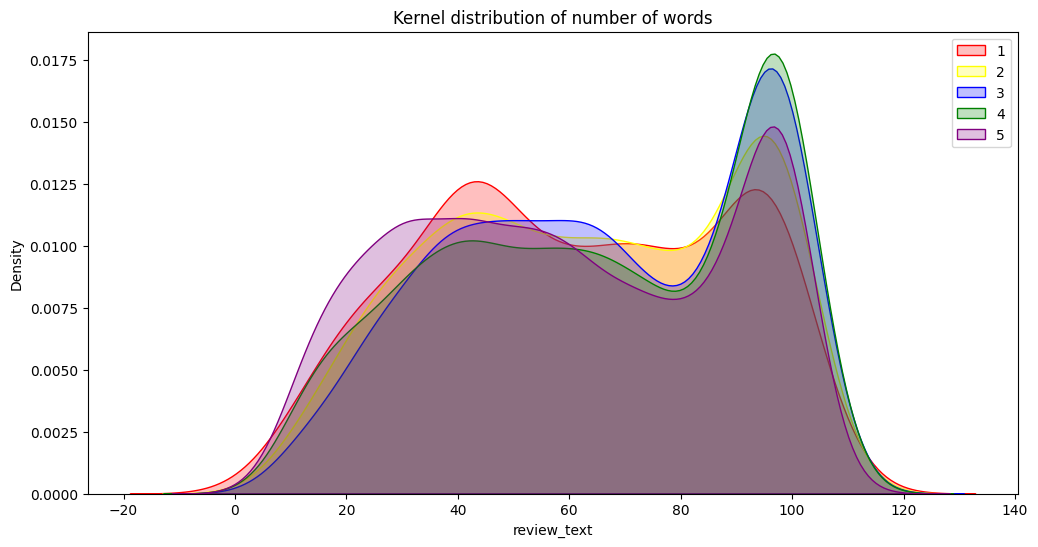

In [38]:
num_1 = df[df['rating']== 1]['review_text'].apply(lambda x: len(x.split()))
num_2 = df[df['rating']== 2]['review_text'].apply(lambda x: len(x.split()))
num_3 = df[df['rating']== 3]['review_text'].apply(lambda x: len(x.split()))
num_4 = df[df['rating']== 4]['review_text'].apply(lambda x: len(x.split()))
num_5 = df[df['rating']== 5]['review_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Kernel distribution of number of words')
sns.kdeplot(num_2, shade=True, color = 'yellow')
sns.kdeplot(num_3, shade=True, color = 'blue')
sns.kdeplot(num_4, shade=True, color = 'green')
sns.kdeplot(num_5, shade=True, color = 'purple')

plt.legend(labels=[1, 2,3,4,5])

In [39]:
df['class_name'].unique()

array(['Jeans', 'Blouses', 'Skirts', 'Pants', 'Swim', 'Sweaters', 'Knits',
       'Fine gauge', 'Dresses', 'Shorts', 'Jackets', 'Outerwear',
       'Lounge', 'Intimates', 'Legwear', 'Trend', 'Sleep', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [40]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def clean_text(d):
  pattern = r'[^a-zA-Z\s]'
  text = re.sub(pattern,'',d)
  return text


names = ['Jeans','Blouses','Skirts','Pants','Swim','Sweaters','Knits','Fine gauge',
         'Jackets','Dresses','Shorts','Lounge','Outerwear','Intimates','Legwear','Sleep','Trend',
         'Layering','nan','Casual bottoms','Chemises']

def clean_stopword(d):
  stop_words = stopwords.words('english')
  for name in names:
    stop_words.append(name)
  return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])


def tokenize(d):
  return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [42]:
import nltk
nltk.download('punkt_tab')

df['final_text'] = df.review_text.apply(clean_text).apply(clean_stopword).apply(tokenize)
df.final_text.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,final_text
0,"[like, reviewers, hesitant, spend, much, pair,..."
1,"[true, bunch, fall, clothing, photos, colors, ..."
2,"[wanted, skirt, work, love, design, way, way, ..."
3,"[love, love, hesitant, buy, first, reviews, ma..."
4,"[absolutely, love, retro, look, swimsuit, firs..."


In [43]:
print(' '.join(df.final_text[0]),'\n')
print(' '.join(df.final_text[1]),'\n')
print(' '.join(df.final_text[100]),'\n')
print(' '.join(df.final_text[1000]),'\n')
print(' '.join(df.final_text[10000]))

like reviewers hesitant spend much pair jeans however purchased retailer day andhonestlythey look good probably would paid full price jeans fresh 

true bunch fall clothing photos colors totally washed model images shame embroidery bright vivid totally unique bib area actually soft corduroy think nice transition fall winter terms fit feel like maybe geared towards slender build slim cut found really flattering since sometimes swim tunics small 

back dress stunning usually petite could get away regular tried xs lbs dd chest good length low cut colors really fun mango one tiny bit sparkle one lines flory airy 

well love dress great material beautiful coloring perfect length true size love pleated neckline feel like old hollywood beauty dress great one retailer 

dress absolutely beautiful love colors design however two issues dress body style made busty girls im ddd small would fit well im lbs chest fit tried medium overall fit worse led another issue waist pleating made look little he

In [44]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(' '.join(df.final_text[0]))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.075, 'neu': 0.637, 'pos': 0.288, 'compound': 0.6908}

In [46]:
texts = [' '.join(df.final_text[i]) for i in range(len(df))]

print(df.review_text[2])
print(texts[2])
print(vader.polarity_scores(texts[0]),f'--> Actual Classification:{df.recommend_index[2]}','\n')

print(df.review_text[25])
print(texts[25])
print(vader.polarity_scores(texts[25]),f'--> Actual Classification:{df.recommend_index[25]}','\n')


print(df.review_text[575])
print(texts[575])
print(vader.polarity_scores(texts[575]),f'--> Actual Classification:{df.recommend_index[575]}','\n')

print(df.review_text[5000])
print(texts[5000])
print(vader.polarity_scores(texts[5000]),f'--> Actual Classification:{df.recommend_index[5000]}','\n')

I so wanted this skirt to work, love the design! but, it's way, way too long... i am 5, 5, 116lb, and the small is 1 inch on the floor. i step on the skirt as i walk.
wanted skirt work love design way way long lb small inch floor step skirt walk
{'neg': 0.075, 'neu': 0.637, 'pos': 0.288, 'compound': 0.6908} --> Actual Classification:0 

Highly recommend this top. received lots of compliments on the day that i wore. recommend wearing with a tank top.
highly recommend top received lots compliments day wore recommend wearing tank top
{'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compound': 0.8871} --> Actual Classification:1 

Was so excited to see that this colorful top came in petite sizes! it fits perfectly and so happy that it doesn't fall too long. looks great with a longer cardigan sweater. very happy with this find .
excited see colorful top came petite sizes fits perfectly happy doesnt fall long looks great longer cardigan sweater happy find
{'neg': 0.0, 'neu': 0.413, 'pos': 0.587, 'com

In [47]:
df.final_text

,final_text
0,"[like, reviewers, hesitant, spend, much, pair,..."
1,"[true, bunch, fall, clothing, photos, colors, ..."
2,"[wanted, skirt, work, love, design, way, way, ..."
3,"[love, love, hesitant, buy, first, reviews, ma..."
4,"[absolutely, love, retro, look, swimsuit, firs..."
...,...
19657,"[feels, soft, like, good, quality, however, re..."
19658,"[oot, dress, blue, fits, greathits, knee, shor..."
19659,"[patient, dress, waiting, almost, forever, til..."
19660,"[deep, doesnt, gape, flatters, neckline, waist..."


In [48]:
for i in range(len(df)):
  df['final_text'][i] = ' '.join(df['final_text'][i])

In [49]:
df['final_text'][:3]

,final_text
0,like reviewers hesitant spend much pair jeans ...
1,true bunch fall clothing photos colors totally...
2,wanted skirt work love design way way long lb ...


In [50]:
X = df.final_text
y = df.recommend_index

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [53]:
def tfidf(words):
  tfidf_vectorizer = TfidfVectorizer()
  data_feature = tfidf_vectorizer.fit_transform(words)
  return data_feature,tfidf_vectorizer


X_train_tfidf,tfidf_vectorizer = tfidf(X_train.tolist())
X_test_tfidf = tfidf_vectorizer.transform(X_test.tolist())

In [54]:
X_train_tfidf.shape

(15729, 15243)

In [55]:
lr_tfidf = LogisticRegression(random_state=42,solver='liblinear')
lr_tfidf.fit(X_train_tfidf,y_train)
y_predicted_lr = lr_tfidf.predict(X_test_tfidf)

In [56]:
def score_metrics(y_test,y_predicted):
  accuracy = accuracy_score(y_test,y_predicted)
  precision = precision_score(y_test,y_predicted,average='macro')
  recall = recall_score(y_test,y_predicted,average='macro')
  print('accuracy=%0.3f,precision=%0.3f,recall=%0.3f' % (accuracy,precision,recall))

In [57]:
score_metrics(y_test,y_predicted_lr)

accuracy=0.888,precision=0.853,recall=0.751


In [58]:
def plot_confusion_matrix(y_test, y_predicted, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True, fmt='.20g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

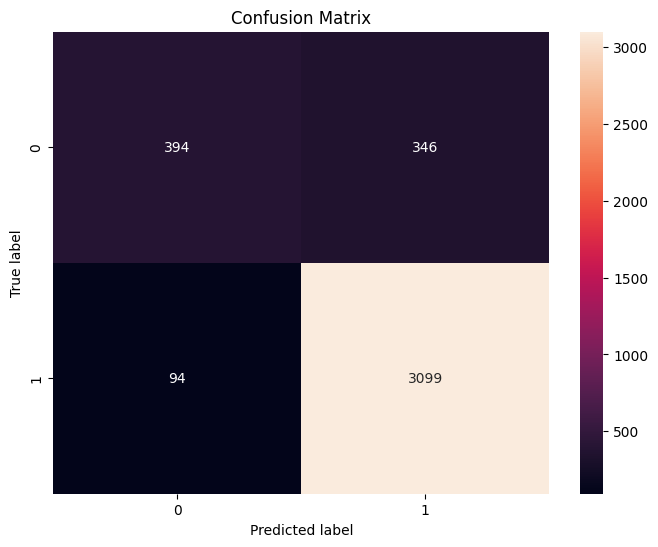

In [59]:
plot_confusion_matrix(y_test,y_predicted_lr)

In [62]:
texts_w2v = df.final_text.apply(tokenize).tolist()

w2v = Word2Vec(sentences=texts_w2v,window=3,vector_size=100,min_count=5,workers=4,sg=1)

In [63]:
texts_w2v[:3]

[['like',
  'reviewers',
  'hesitant',
  'spend',
  'much',
  'pair',
  'jeans',
  'however',
  'purchased',
  'retailer',
  'day',
  'andhonestlythey',
  'look',
  'good',
  'probably',
  'would',
  'paid',
  'full',
  'price',
  'jeans',
  'fresh'],
 ['true',
  'bunch',
  'fall',
  'clothing',
  'photos',
  'colors',
  'totally',
  'washed',
  'model',
  'images',
  'shame',
  'embroidery',
  'bright',
  'vivid',
  'totally',
  'unique',
  'bib',
  'area',
  'actually',
  'soft',
  'corduroy',
  'think',
  'nice',
  'transition',
  'fall',
  'winter',
  'terms',
  'fit',
  'feel',
  'like',
  'maybe',
  'geared',
  'towards',
  'slender',
  'build',
  'slim',
  'cut',
  'found',
  'really',
  'flattering',
  'since',
  'sometimes',
  'swim',
  'tunics',
  'small'],
 ['wanted',
  'skirt',
  'work',
  'love',
  'design',
  'way',
  'way',
  'long',
  'lb',
  'small',
  'inch',
  'floor',
  'step',
  'skirt',
  'walk']]

In [64]:
w2v.wv.doesnt_match('man woman dog child kitchen'.split())

'woman'

In [65]:
w2v.wv.doesnt_match('comfortable bad goog well'.split())

'bad'

In [66]:
w2v.wv.most_similar('fit')

[('fits', 0.7605066895484924),
 ('proportioned', 0.7124678492546082),
 ('stayed', 0.7054281830787659),
 ('worked', 0.6850955486297607),
 ('constricting', 0.6741716861724854),
 ('med', 0.6666849851608276),
 ('ftin', 0.6606466770172119),
 ('sacklike', 0.6599475145339966),
 ('curvyathletic', 0.6588126420974731),
 ('sizei', 0.6577872633934021)]

In [67]:
w2v.wv.most_similar('tight')

[('snug', 0.83851557970047),
 ('tighter', 0.7302204370498657),
 ('baggy', 0.7267546057701111),
 ('tightness', 0.7219187617301941),
 ('roomy', 0.7087453007698059),
 ('raise', 0.7066218852996826),
 ('constricting', 0.7066054344177246),
 ('biceps', 0.7025275826454163),
 ('ample', 0.7018163204193115),
 ('fitted', 0.7016217708587646)]

In [68]:
w2v.wv.most_similar('skirt')

[('dress', 0.672558069229126),
 ('top', 0.634128212928772),
 ('culottes', 0.5898109674453735),
 ('corduroy', 0.5865667462348938),
 ('trousers', 0.5693120360374451),
 ('skort', 0.5622004270553589),
 ('flounce', 0.5534947514533997),
 ('pullon', 0.5523992776870728),
 ('matched', 0.5505510568618774),
 ('lowrise', 0.5504407286643982)]

In [69]:
w2v.wv.most_similar('dark')

[('olive', 0.8451687097549438),
 ('charcoal', 0.8426262736320496),
 ('slate', 0.8358303904533386),
 ('khaki', 0.8352047801017761),
 ('brown', 0.8342868089675903),
 ('wine', 0.8282716870307922),
 ('faded', 0.8282613158226013),
 ('forest', 0.8270769119262695),
 ('tan', 0.8179212212562561),
 ('maroon', 0.8174049854278564)]

In [70]:
def get_avg_vector(sent):
  vector = np.zeros(100)
  total_words = 0
  for word in sent.split():
    if word in w2v.wv.index_to_key:
      vector += w2v.wv.word_vec(word)
      total_words +=1
  if total_words > 0:
    return vector/total_words
  else:
    return vector


df['w2v_vector'] = df['review_text'].map(get_avg_vector)
df[['review_text','w2v_vector']].head(2)

,review_text,w2v_vector
0,Like other reviewers i was hesitant to spend t...,"[-0.10909814698000748, 0.1810759966261685, -0...."
1,As is true of a bunch of the fall clothing pho...,"[-0.14671025501611906, 0.23276701156432048, -0..."


In [71]:
word2vec_X = df['w2v_vector']
y = df['recommend_index']

X_train_word2vec,X_test_word2vec,y_train_word2vec,y_test_word2vec = train_test_split(word2vec_X,y,test_size=0.2,random_state=4)

In [72]:
word2vec_lr = LogisticRegression(random_state=42,solver='liblinear')
word2vec_lr.fit(np.stack(X_train_word2vec),y_train_word2vec)
y_predicted_word2vec_lr = word2vec_lr.predict(np.stack(X_test_word2vec))

In [73]:
score_metrics(y_test,y_predicted_word2vec_lr)

accuracy=0.865,precision=0.805,recall=0.709


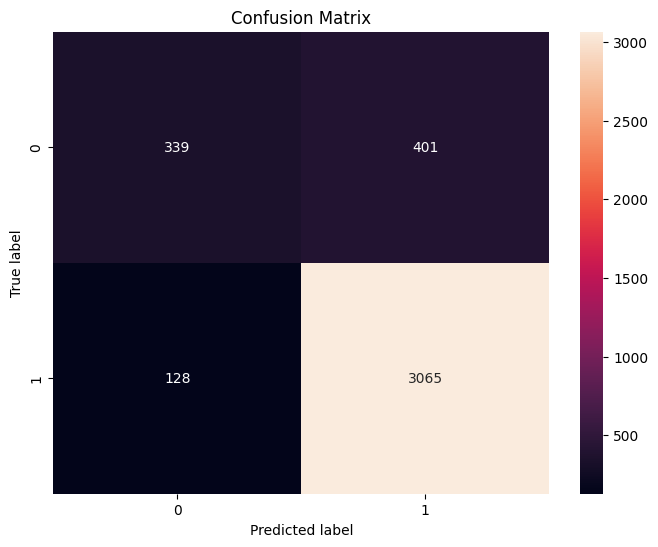

In [74]:
plot_confusion_matrix(y_test,y_predicted_word2vec_lr)

In [75]:
max_words = 5000
max_len = 100


def tokenize_pad_sequences(text):
  tokenizer = Tokenizer(num_words=max_words,lower=True,split=' ')
  tokenizer.fit_on_texts(text)
  X = tokenizer.texts_to_sequences(text)
  X = pad_sequences(X,padding='post',maxlen=max_len)
  return X,tokenizer


print('Before Tokenization & Padding\n',df['review_text'][0],'\n')
X,tokenizer = tokenize_pad_sequences(df['review_text'])
print('After Tokenization & Padding \n',X[0])

Before Tokenization & Padding
 Like other reviewers i was hesitant to spend this much on a pair of jeans. however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full price. these jeans are fresh! 

After Tokenization & Padding 
 [  28  110  367    2   15 1079    8 1508    7   84   11    4  219   13
   93  143    2  139   86   43 1060  146   11  103  264    3 1231   42
   48   16  111    2  281   41   23 1070  307  165   56   93   27 1742
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [77]:
y = pd.get_dummies(df.recommend_index)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (11010, 100) (11010, 2)
Validation Set: (4719, 100) (4719, 2)
Test Set:       (3933, 100) (3933, 2)


In [80]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='sigmoid'))


In [81]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [82]:
es = EarlyStopping(monitor='val_loss',patience=5)

batch_size = 64

history = model.fit(X_trn,y_trn,validation_data=(X_vld,y_vld),
                    batch_size=batch_size,epochs=epochs,verbose=1,callbacks=[es])

Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8156 - loss: 0.4889 - val_accuracy: 0.8241 - val_loss: 0.3771
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8829 - loss: 0.2576 - val_accuracy: 0.8900 - val_loss: 0.2531
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9209 - loss: 0.1885 - val_accuracy: 0.8635 - val_loss: 0.3069
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9070 - loss: 0.2254 - val_accuracy: 0.8926 - val_loss: 0.2946
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9533 - loss: 0.1274 - val_accuracy: 0.8858 - val_loss: 0.3399
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9688 - loss: 0.0949 - val_accuracy: 0.8858 - val_loss: 0.3950
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9764 - loss: 0.0759 - val_accuracy: 0.8642 - val_loss: 0.3908


In [85]:
loss,accuracy = model.evaluate(X_tst,y_tst,verbose=0)

print('Accuracy : {:.4f}'.format(accuracy))

Accuracy : 0.8680


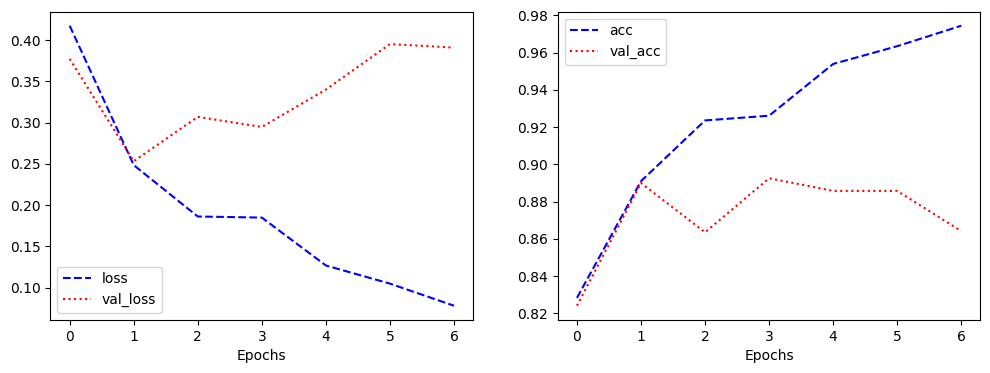

In [86]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


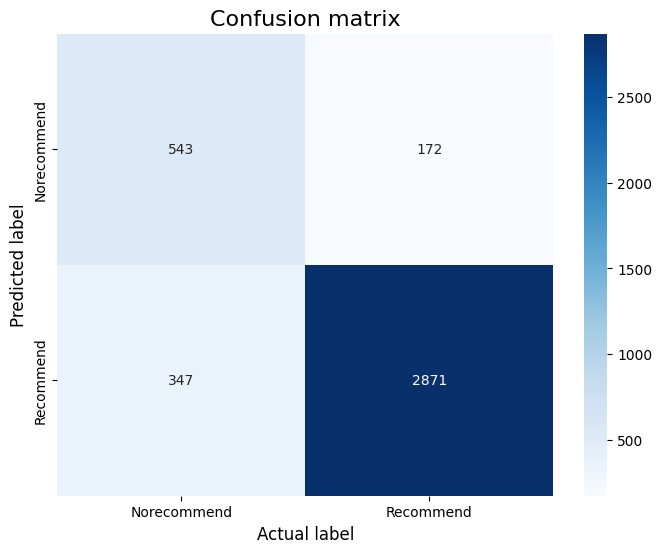

In [87]:
def plot_confusion_matrix(model, X_test, y_test):

    sentiment_classes = ['Norecommend', 'Recommend']
    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_tst, y_tst)